In [1]:
%matplotlib inline
import pandas as pd
import utils

# Chicago Food Inspections
Let's take a look at how Chicago dining establishments fared during inspections by the Department of Public Health so far in 2017. 

# Load Data

In [2]:
raw_data = utils.get_socrata_data("http://data.cityofchicago.org/resource/cwig-ma7x.json")
inspections = pd.DataFrame(raw_data)

Got http://data.cityofchicago.org/resource/cwig-ma7x.json?%24offset=0&%24limit=50000
Writing cwig-ma7x.json?%24offset=0&%24limit=50000
Got http://data.cityofchicago.org/resource/cwig-ma7x.json?%24offset=50000&%24limit=50000
Writing cwig-ma7x.json?%24offset=50000&%24limit=50000
Got http://data.cityofchicago.org/resource/cwig-ma7x.json?%24offset=100000&%24limit=50000
Writing cwig-ma7x.json?%24offset=100000&%24limit=50000


In [3]:
inspections.head()

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_id,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
0,604 N CICERO AVE,QUICK SUB,CHICAGO,QUICK SUB,Restaurant,2015-10-01T00:00:00.000,1578396,Canvass,41.89154610278816,2278446,"{u'type': u'Point', u'coordinates': [-87.74583...",-87.74583186684967,Out of Business,Risk 2 (Medium),IL,NaN,60644
1,2020 W CHICAGO,BAR BARI,CHICAGO,BAR BARI,Restaurant,2011-09-12T00:00:00.000,634525,Canvass,41.896004699879654,2109874,"{u'type': u'Point', u'coordinates': [-87.67793...",-87.6779378973854,Pass,Risk 1 (High),IL,NaN,60622
2,5620 S ASHLAND AVE,NaN,CHICAGO,"ROYAL CATERING SERVICES,LLc",Restaurant,2013-06-28T00:00:00.000,1151417,Canvass,41.79154905521807,2002612,"{u'type': u'Point', u'coordinates': [-87.66466...",-87.66466770942304,No Entry,Risk 1 (High),IL,NaN,60636
3,2634 N CLARK ST,WINGSTOP,CHICAGO,WINGSTOP,Restaurant,2017-01-24T00:00:00.000,1982029,Canvass,41.9305175589043,2253834,"{u'type': u'Point', u'coordinates': [-87.64394...",-87.64394893189049,Fail,Risk 1 (High),IL,29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42...,60614
4,3207 N ELSTON AVE,FOOD FIRST CHICAGO,CHICAGO,FOOD FIRST CHICAGO,Restaurant,2015-12-29T00:00:00.000,1607260,License Re-Inspection,41.939646610904056,2422792,"{u'type': u'Point', u'coordinates': [-87.69847...",-87.69847901358345,Pass,Risk 1 (High),IL,NaN,60618


In [4]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149196 entries, 0 to 149195
Data columns (total 17 columns):
address            149196 non-null object
aka_name           146525 non-null object
city               149045 non-null object
dba_name           149196 non-null object
facility_type      144637 non-null object
inspection_date    149196 non-null object
inspection_id      149196 non-null object
inspection_type    149195 non-null object
latitude           148668 non-null object
license_           149182 non-null object
location           148668 non-null object
longitude          148668 non-null object
results            149196 non-null object
risk               149130 non-null object
state              149188 non-null object
violations         119244 non-null object
zip                149097 non-null object
dtypes: object(17)
memory usage: 19.4+ MB


# Hey there, 2017!
Now that I've loaded the data, I want to narrow it down to inspections conducted since the start of this year.

In [5]:
this_year = inspections[(inspections['inspection_date'] > '2017-01-01')]

In [6]:
this_year.head()

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_id,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
3,2634 N CLARK ST,WINGSTOP,CHICAGO,WINGSTOP,Restaurant,2017-01-24T00:00:00.000,1982029,Canvass,41.9305175589043,2253834,"{u'type': u'Point', u'coordinates': [-87.64394...",-87.64394893189049,Fail,Risk 1 (High),IL,29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42...,60614
10,311-319 N MORGAN ST,ACE HOTEL CHICAGO,CHICAGO,ACE HOTEL CHICAGO,Restaurant,2017-06-01T00:00:00.000,2059410,License Re-Inspection,41.88712191392366,2501655,"{u'type': u'Point', u'coordinates': [-87.65203...",-87.6520357596219,Pass,Risk 3 (Low),IL,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,60607
27,541 N FAIRBANKS CT,NaN,CHICAGO,HALSTED STREET DELI,Restaurant,2017-02-23T00:00:00.000,1989612,Canvass,41.892274965646884,2350236,"{u'type': u'Point', u'coordinates': [-87.62009...",-87.62009879454878,Pass,Risk 1 (High),IL,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,60611
41,1414 E 61ST PL,Andrew Carnegie Elementary,CHICAGO,Carnegie,School,2017-01-19T00:00:00.000,1981710,Canvass,41.783395771004585,22551,"{u'type': u'Point', u'coordinates': [-87.59079...",-87.59079648673224,Pass,Risk 1 (High),IL,"41. PREMISES MAINTAINED FREE OF LITTER, UNNECE...",60637
76,769 W JACKSON BLVD,PHILLY'S BEST,CHICAGO,PHILLY'S BEST,Restaurant,2017-04-21T00:00:00.000,2028750,Complaint,41.877843584048115,1909742,"{u'type': u'Point', u'coordinates': [-87.64678...",-87.6467818341113,Fail,Risk 1 (High),IL,29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42...,60661


# What can we learn?
I'm going to narrow the data down by certain fields--what parts of the city were the most inspections carried out, what types of facilities were inspected, how did they do, and what are their names?

In [37]:
this_year.zip.value_counts().reset_index()

,index,zip
0,60647,316
1,60625,287
2,60618,278
3,60641,257
4,60657,241
5,60610,240
6,60640,219
7,60638,218
8,60617,216
9,60614,216


It looks like most inspections were carried out in the 60647 zip code, which comprises Logan Square and Bucktown. What the numbers don't tell us is *why* this area has had so many inspections. Are there just more food places in the area, or is something else going on?

In [8]:
this_year.facility_type.value_counts().reset_index()

,index,facility_type
0,Restaurant,5185
1,Grocery Store,662
2,School,600
3,Children's Services Facility,129
4,Bakery,93
5,Daycare (2 - 6 Years),83
6,Daycare Above and Under 2 Years,80
7,Long Term Care,59
8,Mobile Food Preparer,50
9,Liquor,36


In [9]:
this_year.results.value_counts().reset_index()

,index,results
0,Pass,4241
1,Fail,1459
2,Pass w/ Conditions,739
3,Out of Business,352
4,No Entry,349
5,Not Ready,151
6,Business Not Located,2


The good news is, many more dining establishments have passed their inspections than failed them!

In [10]:
this_year.risk.value_counts().reset_index()

,index,risk
0,Risk 1 (High),5817
1,Risk 2 (Medium),1010
2,Risk 3 (Low),451
3,All,9


The data set doesn't really explain what constitutes a high risk versus a low one, so this is definitely something to ask about.

In [11]:
this_year.dba_name.value_counts().reset_index()

,index,dba_name
0,SUBWAY,130
1,DUNKIN DONUTS,33
2,PALETERIA Y NEVERIA LA MEXICANA YOGURT AND CHURRO,17
3,KENTUCKY FRIED CHICKEN,17
4,KFC,14
5,POTBELLY SANDWICH WORKS LLC,14
6,CORNER BAKERY CAFE,13
7,MCDONALD'S,12
8,CHIPOTLE MEXICAN GRILL,12
9,CHICAGO HILTON & TOWERS,12


In [28]:
hospital = this_year[this_year.facility_type == 'Hospital']

In [29]:
hospital.head()

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_id,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
28177,2750 W 15TH PL,MT SINAI HOSPITAL MEDICAL CTR,CHICAGO,MT SINAI HOSPITAL MEDICAL CTR,Hospital,2017-01-13T00:00:00.000,1982240,Canvass,41.860248190286214,2204505,"{u'type': u'Point', u'coordinates': [-87.69528...",-87.69528799858925,Pass,Risk 1 (High),IL,NaN,60608
37994,2211 N OAK PARK AVE,SHRINERS HOSPITALS FOR CHILDREN,CHICAGO,SHRINERS HOSPITALS FOR CHILDREN,Hospital,2017-03-31T00:00:00.000,2015236,Canvass,41.920336171536384,15783,"{u'type': u'Point', u'coordinates': [-87.79499...",-87.7949943024895,Pass,Risk 1 (High),IL,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",60707
39390,2750 W 15TH PL,MT SINAI HOSPITAL MEDICAL CTR,CHICAGO,MT SINAI HOSPITAL MEDICAL CTR,Hospital,2017-01-06T00:00:00.000,1672217,Canvass,41.860248190286214,1488042,"{u'type': u'Point', u'coordinates': [-87.69528...",-87.69528799858925,Fail,Risk 1 (High),IL,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,60608
40201,2320 E 93RD ST,ADVOCATE TRINITY HOSPITAL,CHICAGO,ADVOCATE TRINITY HOSPITAL,Hospital,2017-05-08T00:00:00.000,1753212,Canvass,41.726329231442904,16380,"{u'type': u'Point', u'coordinates': [-87.56727...",-87.56727090823563,Pass,Risk 1 (High),IL,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",60617
65739,500 E 51ST ST,PROVIDENT CAFE,CHICAGO,PROVIDENT CAFE,Hospital,2017-04-19T00:00:00.000,2028571,License,41.802238709769085,2496842,"{u'type': u'Point', u'coordinates': [-87.61399...",-87.61399572714086,Not Ready,Risk 1 (High),IL,NaN,60615


# Charts!
I want to create a chart, but given the large amount of data in this data set, I've decided to narrow down the results to a small subset such that the chart can actually be easily read. (I tried to chart the inspection results based on the name of the dining establishment, and there were so many columns it was impossible to make anything out.)

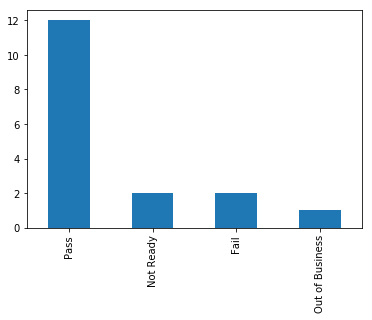

In [30]:
hospital.results.value_counts().plot(kind='bar')

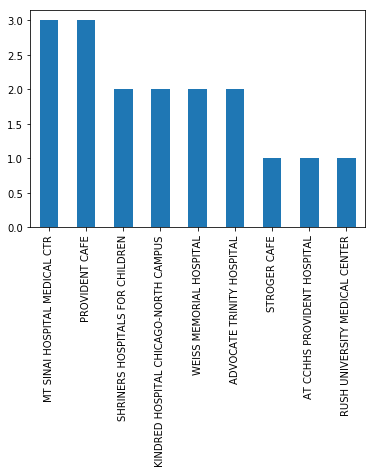

In [31]:
hospital.dba_name.value_counts().plot(kind='bar')